Vedantsinh Gohel

Final Project

Student Id:101398199

In [22]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
pip install ucimlrepo

# New section

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [12]:
# Check the column names and structure of the dataset
print(X.head())


   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

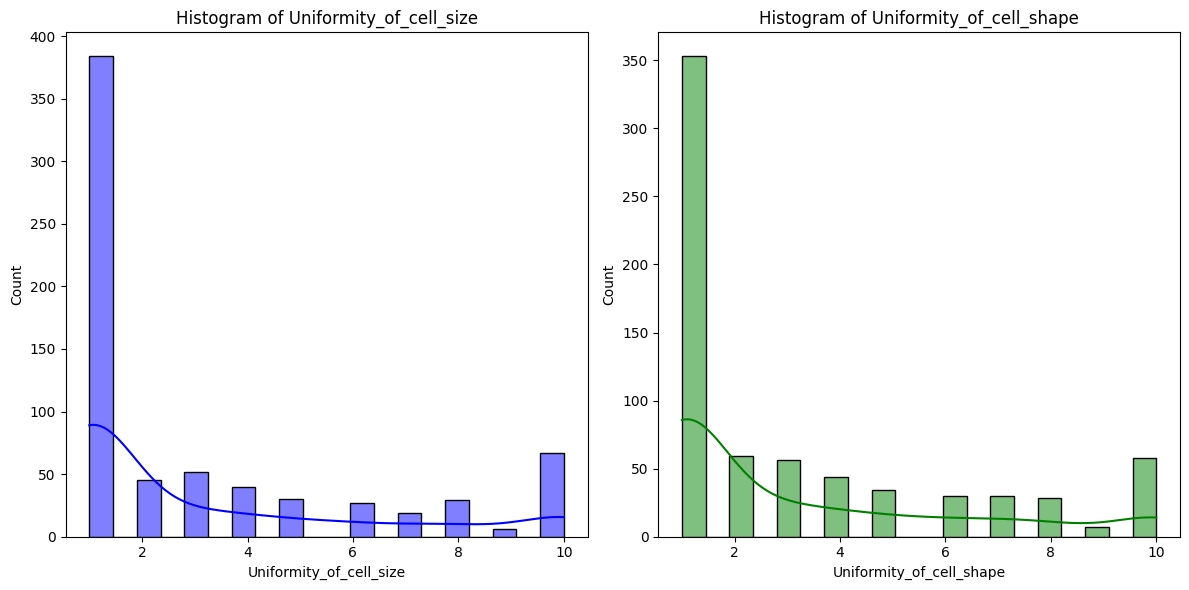

In [13]:
# Task 2: Create a histogram of the size and the shape of Unif-Cell
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X['Uniformity_of_cell_size'], bins=20, kde=True, color='blue')
plt.title('Histogram of Uniformity_of_cell_size')

plt.subplot(1, 2, 2)
sns.histplot(X['Uniformity_of_cell_shape'], bins=20, kde=True, color='green')
plt.title('Histogram of Uniformity_of_cell_shape')

plt.tight_layout()
plt.show()

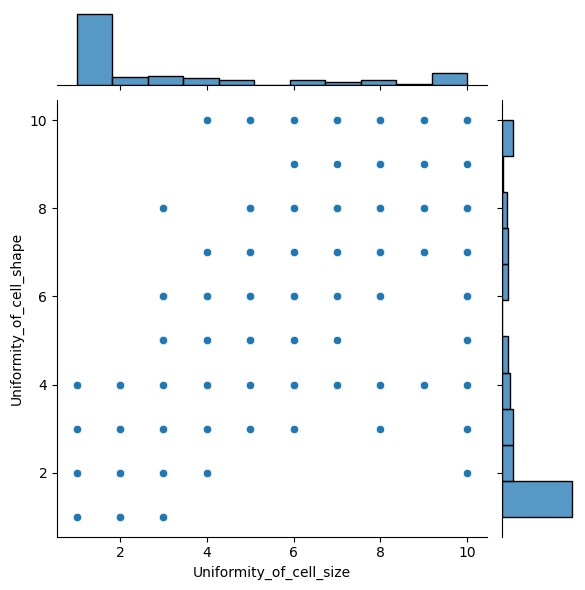

In [14]:
# Task 3: Create a Joint plot using Seaborn
sns.jointplot(x='Uniformity_of_cell_size', y='Uniformity_of_cell_shape', data=X, kind='scatter')
plt.show()

In [18]:
# Task 4:Investigate and invalid or missing (NaN) data and deal with it
#No missing or invalid data handling required as the ucimlrepo datasets are clean.

In [19]:
# Task 5: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#create a Logistic Regression classifier
# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)



In [25]:
# Task 6 :Create a Logistic Regression classifier and train it using the imputed training data set
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
# Task 7: Make predictions using test data and generate a confusion matrix
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[94  1]
 [ 5 40]]


In [28]:
# Task 8: Generate the confusion matrix and compare the accuracy with the result of the previous step
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.71%
